# Additional analysis for the revision

In [2]:
library("cowplot")
library("ggplot2")
theme_set(theme_cowplot(font_family = "Times", font_size=12)) # Font size and type


In [3]:
# Set directories
root <- ""
savedir <- "saved_models/"
fig_savedir <- paste(root, "results/revision/", sep = "")
fig_tag <- ""

# Load survival data
treatments <- readRDS(paste(root, "data/surv_data/treatments.RData", sep = "")) # character vector of antimicrobial names
data <- readRDS(paste(root, "data/surv_data/data.RData", sep = "")) # strain-specific survival data
data_sites <- readRDS(paste(root, "data/surv_data/data_sites.RData", sep = ""))

In [4]:
#source("scripts/ast_data_preprocessing.R") # To update data files. Requires raw data files.

## Phenotypic data

Note! For phenotypic resistance, not all isolates were tested for MIC values
- If they had the same susceptibility designation, all visits between them were assumed to have the same designation as well and were not tested.
    - These are marked as NAs in the data.
- If the designations disagreed for the first and final visit, the resistances were tested for all other isolates as well.


In [54]:
# Load data with phenotypic resistance included

ast_data <- readRDS(paste(root, "data/ast_data.RData", sep = ""))
head(ast_data)


,ID,Visit..,Cx.Site,MUP Susceptibility designation,CHG Susceptibility designation,strain,mupirocin_llr,mupirocin_hlr,Mupirocin,Chlorhexidine
,<int>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>
1,1008,R0,nares,Susceptible,Reduced-Susceptibility,1,0,0,S,S
2,1013,R0,nares,Susceptible,Reduced-Susceptibility,1115,0,0,S,S
3,1018,R0,nares,Susceptible,Reduced-Susceptibility,1097,0,0,S,S
4,1023,R0,nares,Low-level R,Susceptible,2,1,0,S,S
5,1024,R0,nares,NA,NA,357,NA,NA,,R
6,1026,R0,nares,Susceptible,Susceptible,358,0,0,S,S


### Table of discrepancies between phenotypic and genotypic resistance

Create a table which compares genotypic and phenotypic resistance counts (number of isolates) for mupirocin and chlorhexidine.

Gen = genetic
Phe/P = phenotypic



In [6]:
## Mupirocin
sus_des <- "MUP Susceptibility designation"

res_df_mup <- data.frame("GenR" = c(NA), "GenS" = c(NA), "GenNA" = c(NA))


# PHLR

PHLR <- c(dim(ast_data[which((ast_data[,sus_des] == "High-level R") &
                           ast_data[,"Mupirocin"] == "R"),])[1], 
          dim(ast_data[which((ast_data[,sus_des] == "High-level R") &
                           ast_data[,"Mupirocin"] == "S"),])[1],
          dim(ast_data[which((ast_data[,sus_des] == "High-level R") &
                           (ast_data[,"Mupirocin"] == "" | is.na(ast_data[,"Mupirocin"]))),])[1])
# PLLR

PLLR <- c(dim(ast_data[which((ast_data[,sus_des] == "Low-level R") &
                           ast_data[,"Mupirocin"] == "R"),])[1], 
          dim(ast_data[which((ast_data[,sus_des] == "Low-level R") &
                           ast_data[,"Mupirocin"] == "S"),])[1],
          dim(ast_data[which((ast_data[,sus_des] == "Low-level R") &
                           (ast_data[,"Mupirocin"] == "" | is.na(ast_data[,"Mupirocin"]))),])[1])

# PS


PS <- c(dim(ast_data[which((ast_data[,sus_des] == "Susceptible") &
                           ast_data[,"Mupirocin"] == "R"),])[1], 
          dim(ast_data[which((ast_data[,sus_des] == "Susceptible") &
                          ast_data[,"Mupirocin"] == "S"),])[1],
          dim(ast_data[which((ast_data[,sus_des] == "Susceptible") &
                           (ast_data[,"Mupirocin"] == "" | is.na(ast_data[,"Mupirocin"]))),])[1])


# PNA

PNA <- c(dim(ast_data[which(is.na(ast_data[,sus_des]) &
                           ast_data[,"Mupirocin"] == "R"),])[1], 
          dim(ast_data[which(is.na(ast_data[,sus_des]) &
                           ast_data[,"Mupirocin"] == "S"),])[1],
          dim(ast_data[which(is.na(ast_data[,sus_des]) &
                           (ast_data[,"Mupirocin"] == "" | is.na(ast_data[,"Mupirocin"]))),])[1])

PHLR
res_df_mup <- t(data.frame(cbind(PHLR, PLLR, PS, PNA)))
colnames(res_df_mup) <- c("GenR", "GenS", "GenNA")

print("Mupirocin")
res_df_mup

sum(res_df_mup)
dim(ast_data)

[1] 216  30  10

[1] "Mupirocin"


,GenR,GenS,GenNA
PHLR,216,30,10
PLLR,0,51,1
PS,30,2213,101
PNA,28,529,52


[1] 3261

[1] 3261   10

In [7]:
## Chlorhexidine
sus_des <- "CHG Susceptibility designation"

res_df_chg <- data.frame("GenR" = c(NA), "GenS" = c(NA), "GenNA" = c(NA))

# PR-S

PRS <- c(dim(ast_data[which((ast_data[,sus_des] == "Reduced-Susceptibility") &
                           ast_data[,"Chlorhexidine"] == "R"),])[1], 
          dim(ast_data[which((ast_data[,sus_des] == "Reduced-Susceptibility") &
                           ast_data[,"Chlorhexidine"] == "S"),])[1],
          dim(ast_data[which((ast_data[,sus_des] == "Reduced-Susceptibility") &
                           (ast_data[,"Chlorhexidine"] == "" | is.na(ast_data[,"Chlorhexidine"]))),])[1])
# PS

PS <- c(dim(ast_data[which((ast_data[,sus_des] == "Susceptible") &
                           ast_data[,"Chlorhexidine"] == "R"),])[1], 
          dim(ast_data[which((ast_data[,sus_des] == "Susceptible") &
                           ast_data[,"Chlorhexidine"] == "S"),])[1],
          dim(ast_data[which((ast_data[,sus_des] == "Susceptible") &
                           (ast_data[,"Chlorhexidine"] == "" | is.na(ast_data[,"Chlorhexidine"]))),])[1])

# PNA

PNA <- c(dim(ast_data[which(is.na(ast_data[,sus_des]) &
                           ast_data[,"Chlorhexidine"] == "R"),])[1], 
          dim(ast_data[which(is.na(ast_data[,sus_des]) &
                           ast_data[,"Chlorhexidine"] == "S"),])[1],
          dim(ast_data[which(is.na(ast_data[,sus_des]) &
                           (ast_data[,"Chlorhexidine"] == "" | is.na(ast_data[,"Chlorhexidine"]))),])[1])

res_df_chg <- t(data.frame(cbind(PRS, PS, PNA)))
colnames(res_df_chg) <- c("GenR", "GenS", "GenNA")

print("Chlorhexidine")
res_df_chg
sum(res_df_chg) == dim(ast_data)[1]


[1] "Chlorhexidine"


,GenR,GenS,GenNA
PRS,43,236,35
PS,235,1907,123
PNA,91,527,45


[1] FALSE

In [8]:
res_df <- rbind(res_df_mup, res_df_chg)
res_df

,GenR,GenS,GenNA
PHLR,216,30,10
PLLR,0,51,1
PS,30,2213,101
PNA,28,529,52
PRS,43,236,35
PS,235,1907,123
PNA,91,527,45


## Low vs high-level resistance

Here, we use phenotypic high-level resistance (HLR) and low-level resistance as coefficients for mupirocin in our Bayesian survival model instead of genetic mupirocin resistance.


In [9]:
# Load survival data with phenotypic mupirocin resistance (genetic resistance still used for other antibiotics/antimicrobials)

data_ast <- readRDS(paste(root, "data/surv_data/data_ast.RData", sep = ""))


In [10]:
# Counts comparing HLR and LLR:
table(data_ast$mupirocin_hlr)
table(data_ast$mupirocin_llr)


  0   1 
772  91 


  0   1 
845  17 

In [11]:
library("rstanarm")
source("scripts/utilities.R")
source("scripts/article_vis.R")
treatments <- readRDS(paste(root, "data/surv_data/treatments.RData", sep = "")) # character vector of antimicrobial names


get_model2 <- function(data, params, raneff = c(), formula_start = "Surv(time = t0, time2 = delta_t, event=y, type = 'interval') ~", adapt_delta = 0.95, prior = normal(0, 2.5), prior_intercept = normal(0,20), iter = 5000){
    #' Fit a joint model for all params (antibiotics). This is the model used in the manuscript
    #'
    #' @param data Survival data frame.
    #' @param params Covariates to estimate, here antimicrobials of interest.
    #' @param formula_start Beginning of the formula as a string, censoring type etc is defined here.

    # Process random effects:
    re <- ""
    if (length(raneff) != 0){
    re <-gsub(",", "", toString(paste(paste("+(1|", raneff, sep = ""), ")", sep = "")))
    }
    
    params <- check_no_resistant_obs(data, params)
    
    formula <- paste(paste(formula_start, gsub(",", " + ", toString(params)), sep = ""),re, sep = "")
    print(formula)
    mod2 <- stan_surv(formula = as.formula(formula), data = as.data.frame(data), basehaz = "exp", refresh = 0, iter = iter, adapt_delta = adapt_delta, prior_intercept = prior_intercept, prior = prior)
    
    return(mod2)
}

Loading required package: Rcpp

This is rstanarm version 2.21.2

- See https://mc-stan.org/rstanarm/articles/priors for changes to default priors!

- Default priors may change, so it's safest to specify priors, even if equivalent to the defaults.

- For execution on a local, multicore CPU with excess RAM we recommend calling

  options(mc.cores = parallel::detectCores())



[1] "Required ggplot2"
[1] "Required gridExtra"


Loading required package: gridExtra



[1] "Required cowplot"
[1] "Required bayesplot"


Loading required package: bayesplot

This is bayesplot version 1.10.0

- Online documentation and vignettes at mc-stan.org/bayesplot

- bayesplot theme set to bayesplot::theme_default()

   * Does _not_ affect other ggplot2 plots

   * See ?bayesplot_theme_set for details on theme setting



[1] "Required reshape2"


Loading required package: reshape2



[1] "Required rstanarm"
[1] "Required igraph"


Loading required package: igraph

Warning message:
“package ‘igraph’ was built under R version 4.2.0”

Attaching package: ‘igraph’


The following objects are masked from ‘package:stats’:

    decompose, spectrum


The following object is masked from ‘package:base’:

    union




In [12]:
adapt_delta <- 0.99
mod_d <- get_model2(data_ast[which(data_ast$ARM == 1),], params = c(treatments[treatments != "Mupirocin"], "mupirocin_hlr", "mupirocin_llr"), raneff = c("host_id", "strain"), adapt_delta = adapt_delta, iter = 7500)


[1] "Surv(time = t0, time2 = delta_t, event=y, type = 'interval') ~Ciprofloxacin +  Clindamycin +  Erythromycin +  Gentamicin +  Rifampicin +  Tetracycline +  Trimethoprim +  Chlorhexidine +  mupirocin_hlr +  mupirocin_llr+(1|host_id) +(1|strain)"


In [13]:

p_ast_d <- get_mcmc_intervals(mod_d,
                params = c(treatments[treatments != "Mupirocin"], "mupirocin_hlr", "mupirocin_llr"),
                title = "Mupirocin HRL vs LLR, Host + Strain\nDecolonization") +
                scale_y_discrete(limits = rev(c(treatments[treatments != "Mupirocin"], "mupirocin_hlr", "mupirocin_llr")),
                                   labels = rev(c(treatments[treatments != "Mupirocin"], "Mupirocin HLR", "Mupirocin LLR")))#+ scale_y_discrete(limits = rev(c(treatments[treatments != "Mupirocin"], "Mupirocin HLR", "Mupirocin LLR")))
                                 
#p_ast_d

Warning message:
“Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead.”
Scale for y is already present.
Adding another scale for y, which will replace the existing scale.


In [14]:
mod_e <- get_model2(data_ast[which(data_ast$ARM == 0),], params = c(treatments[treatments != "Mupirocin"], "mupirocin_hlr", "mupirocin_llr"), raneff = c("host_id", "strain"), adapt_delta = adapt_delta, iter = 7500)


[1] "Surv(time = t0, time2 = delta_t, event=y, type = 'interval') ~Ciprofloxacin +  Clindamycin +  Erythromycin +  Gentamicin +  Rifampicin +  Tetracycline +  Trimethoprim +  Chlorhexidine +  mupirocin_hlr +  mupirocin_llr+(1|host_id) +(1|strain)"


In [15]:
p_ast_e <- get_mcmc_intervals(mod_e, 
                params = c(treatments[treatments != "Mupirocin"], "mupirocin_hlr", "mupirocin_llr"),
                title = "\nEducation",
                col_scheme = "pink") +
                scale_y_discrete(limits = rev(c(treatments[treatments != "Mupirocin"], "mupirocin_hlr", "mupirocin_llr")),
                labels = rev(c(treatments[treatments != "Mupirocin"], "Mupirocin HLR", "Mupirocin LLR")))

#p_ast_e

Scale for y is already present.
Adding another scale for y, which will replace the existing scale.


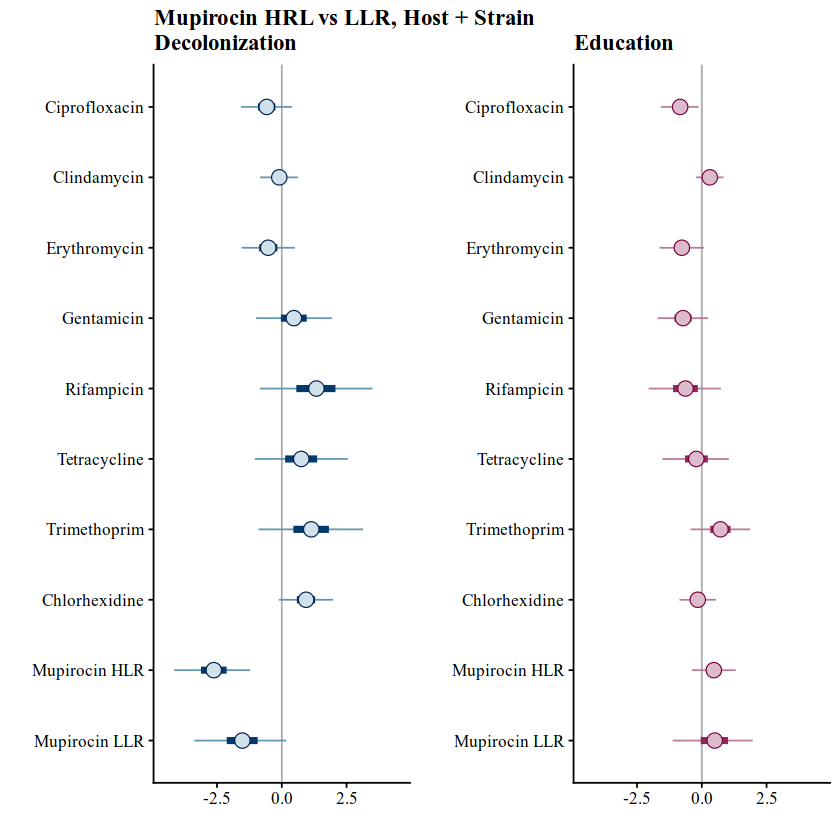

In [16]:
plot_grid(p_ast_d + coord_cartesian(xlim = c(-4.5, 4.5)), p_ast_e + coord_cartesian(xlim = c(-4.5, 4.5)), nrow = 1, ncol = 2)

In [17]:
fname = "S8_fig.pdf"
pdf(paste(fig_savedir, fname, sep = ""), width = 7, height = 3)
plot_grid(p_ast_d+ coord_cartesian(xlim = c(-4.5, 4.5)), p_ast_e+ coord_cartesian(xlim = c(-4.5, 4.5)), nrow = 1, ncol = 2)
dev.off()

png 
  2

## Collinearity

We assess the collinearity between coefficients (genetic resistance) by using scatterplots of MCMC draws. `bayesplot` and `rstanarm` packages are used.

In [18]:
library("rstanarm")
library("bayesplot")

In [19]:
mods <- read_model_set(savedir, mod_id = 2, c("host_idstrain"))

In [20]:
print(treatments)

[1] "Ciprofloxacin" "Clindamycin"   "Erythromycin"  "Gentamicin"   
[5] "Mupirocin"     "Rifampicin"    "Tetracycline"  "Trimethoprim" 
[9] "Chlorhexidine"


In [21]:

get_collinearity_plots <- function(mod, pars, col_scheme = "blue"){
    
    color_scheme_set(col_scheme)
    
    collinear_plots <- list()
    
    js <- 2
    i <- 1
    for (p1 in pars){
        
        if (js < length(pars)){
            for(j in js:length(pars)){

                #print(paste(p1, pars[j]))
                collinear_plots[[i]] <- plot(mod, "scatter", pars = c(p1, pars[j]))
                i <- i + 1
            }
            
            js <- js + 1
        }


    }
    
    return(collinear_plots)
}

In [22]:
p_col_d <- get_collinearity_plots(mods$mod_host_idstrainD, pars = treatments)

png 
  2

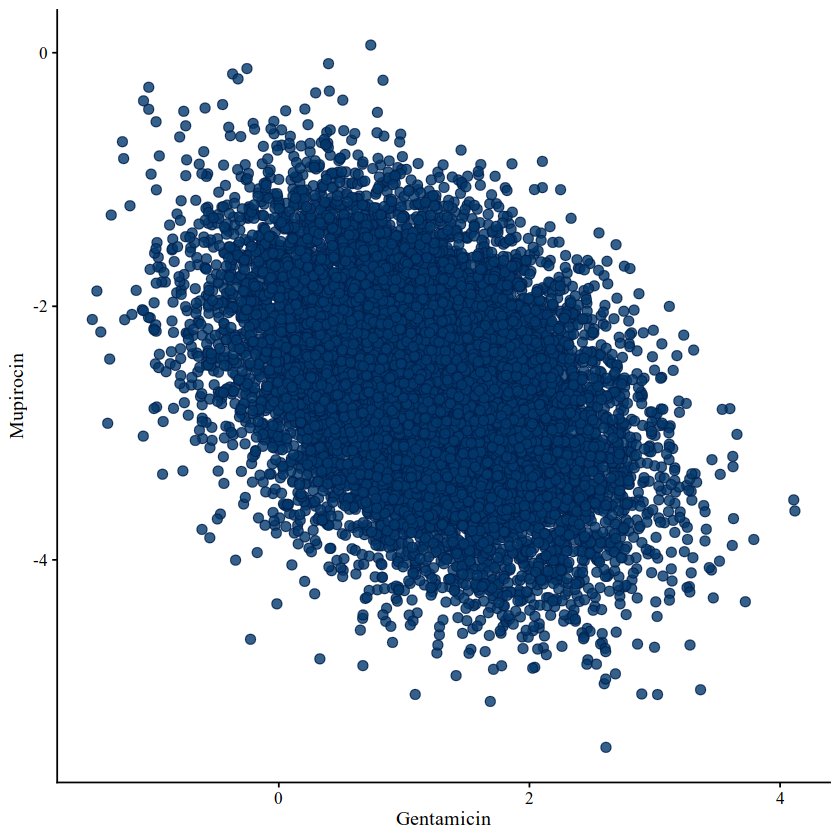

In [24]:
p_col_d[[22]]

In [25]:
# Education arm:

p_col_e <- get_collinearity_plots(mods$mod_host_idstrainE, pars = treatments, col_scheme = "pink")


## Correlation heatmap

Here, we visualize the Spearman correlation between different genetic resistances to assess collinearity further.


              Ciprofloxacin Clindamycin Erythromycin Gentamicin   Mupirocin
Ciprofloxacin   1.000000000          NA           NA         NA          NA
Clindamycin     0.005952381 1.000000000           NA         NA          NA
Erythromycin    0.046878953 0.256767685  1.000000000         NA          NA
Gentamicin     -0.040004522 0.211747203  0.046036758 1.00000000          NA
Mupirocin       0.023074083 0.113832145 -0.023152949 0.34783698  1.00000000
Rifampicin      0.059829303 0.194999209  0.055275541 0.20102911 -0.05742906
Tetracycline    0.000668934 0.010108336 -0.042205861 0.04466715  0.16768626
Trimethoprim    0.010777527 0.008122194 -0.032663347 0.23289531  0.09651439
Chlorhexidine   0.065919790 0.188672681  0.005179849 0.30307204  0.26866347
               Rifampicin Tetracycline Trimethoprim Chlorhexidine
Ciprofloxacin          NA           NA           NA            NA
Clindamycin            NA           NA           NA            NA
Erythromycin           NA           NA    

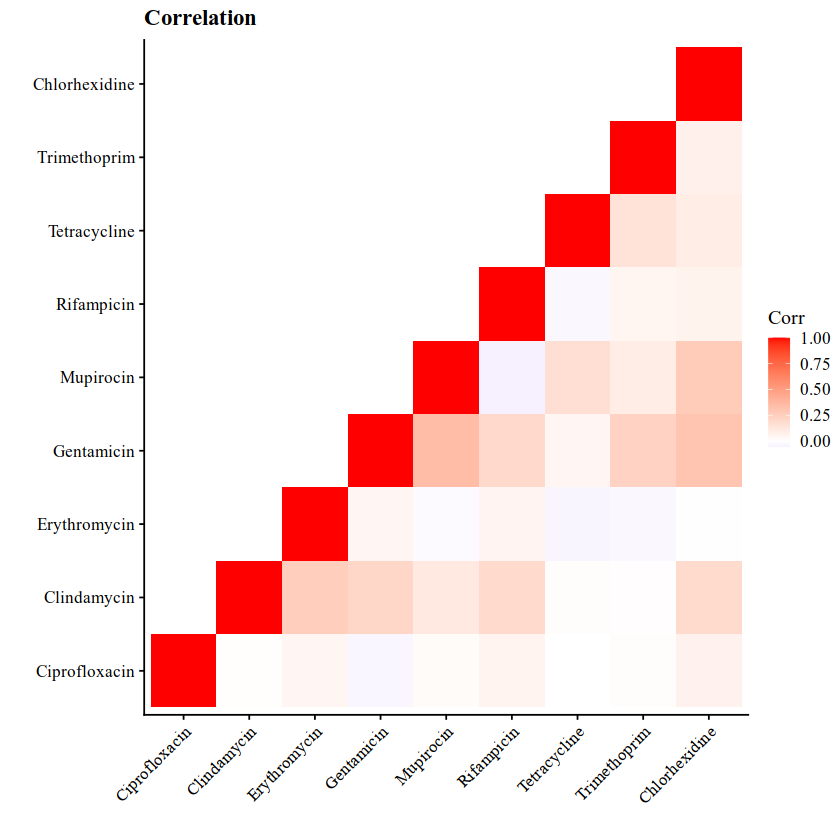

In [27]:
get_resistance_correlation <- function(data, treatments, title = "Correlation between Resistances"){
    #' Get pearson correlation between resistances from data as a heatmap
    
    cormat <- cor(na.omit(apply(data[,treatments], 2, as.numeric)), method = "spearman")
    cormat[upper.tri(cormat)] <- NA
    
    print(cormat)

    p1 <- ggplot(melt(cormat, na.rm = TRUE), aes(Var1, Var2, fill= value)) + 
        labs(x = "", y="", fill = "Corr", title = title) +
        geom_tile() +
        scale_fill_gradient2(low = "blue", high = "red", mid = "white", midpoint = 0,guide = "colorbar") +
        #theme_cowplot(12) +
        theme(axis.text.x = element_text(angle = 45, hjust = 1),panel.background = element_blank())
    

    return(p1)
}

p_cor <- get_resistance_correlation(data, treatments, title = "Correlation")

p_cor


In [28]:
# Plot correlation heatmap and mup-gen collinearity side-by-side

# renamed figure for the publication:
fname <- "S10_fig.pdf"
pdf(paste(fig_savedir, fname, sep = ""), width = 7, height = 3)
plot_grid(p_col_d[[22]] + labs(title = "Collinearity"), p_cor)
dev.off()

png 
  2

png 
  2

# Baselines


To compare the chosen model with other survival model configurations, we consider alternative models:
- A model with only the intercept term (`saved_models/baselines/model0/`)
- Models with only one antimicrobial as a covariate per model (`saved_models/baselines/model1/`)
- A model with no random effects


The models were run on a computing cluster for efficiency and visualized here.


In [29]:
source("scripts/utilities.R")
source("scripts/article_vis.R") # Load plotting functions

[1] "Required ggplot2"
[1] "Required gridExtra"
[1] "Required cowplot"
[1] "Required bayesplot"
[1] "Required reshape2"
[1] "Required rstanarm"
[1] "Required igraph"


In [30]:
mod_id <- 1
raneff <- "host_idstrain" # Choose random effects: fixed, host_id, strain, host_idstrain



savedir <- paste(paste(root, paste("saved_models/baselines/model", mod_id, sep =""), sep = ""), "/", sep = "")

if(mod_id == 2){
    savedir <- "saved_models/"
}
#





mods <- read_model_set(savedir, mod_id = mod_id, c(raneff))
#site_mods <- read_model_set(paste(savedir, "site_models/", sep = ""), 2, c(raneff), is_site = TRUE)

pars <- treatments
if(mod_id == 0){pars <- c("(Intercept)")}

#mods

In [31]:
names(mods)

modnameD <- paste(paste("mod_", raneff, sep = ""), "D", sep = "")
modnameE <- paste(paste("mod_", raneff, sep = ""), "E", sep = "")

print(modnameD)
print(modnameE)



[1] "mod_host_idstrainD" "mod_host_idstrainE"

[1] "mod_host_idstrainD"
[1] "mod_host_idstrainE"


In [32]:
fig_tag <- ""

is_mod1 <- FALSE
if(mod_id == 1){
    is_mod1 <- TRUE
}

In [33]:
source("scripts/article_vis.R") # Load plotting functions

get_raneff_id <- function(raneff){
    #' Checks what random effects are included and returns a suitable addition to the title of a figure
    #'
    #' @param raneff A string describing what random effects are included in the model. Can be one of the following: host_id, strain, host_idstrain or fixed.
    
    if(raneff == "host_idstrain"){
        raneff_id <- "Subject + Strain"
    }else if(raneff == "strain"){
        raneff_id <- "Strain"
    }
    else if(raneff == "fixed"){
        raneff_id <- "Fixed effects"
    }
        
    return(raneff_id)
}

if(mod_id == 0){   
    title <- paste("Intercept only model, ", get_raneff_id(raneff), sep = "")
    fname <- paste(paste("mod0_", raneff, sep = ""), "_arm_figs", sep = "")
}

if(mod_id == 1){
    title <- paste("Separate models for each covariate, ", get_raneff_id(raneff), sep = "")
    fname <- paste(paste("mod1_", raneff, sep = ""), "_arm_figs", sep = "")
}

if(mod_id == 2){
    title <- paste("Impact of resistance on MRSA clearance, ", get_raneff_id(raneff), sep = "")
    fname <- paste(paste("mod2_", raneff, sep = ""), "_arm_figs", sep = "")
}


print(paste("Title of the figure:", title))
print(paste("Filename of the figure:", fname))

[1] "Required ggplot2"
[1] "Required gridExtra"
[1] "Required cowplot"
[1] "Required bayesplot"
[1] "Required reshape2"
[1] "Required rstanarm"
[1] "Required igraph"
[1] "Title of the figure: Separate models for each covariate, Subject + Strain"
[1] "Filename of the figure: mod1_host_idstrain_arm_figs"


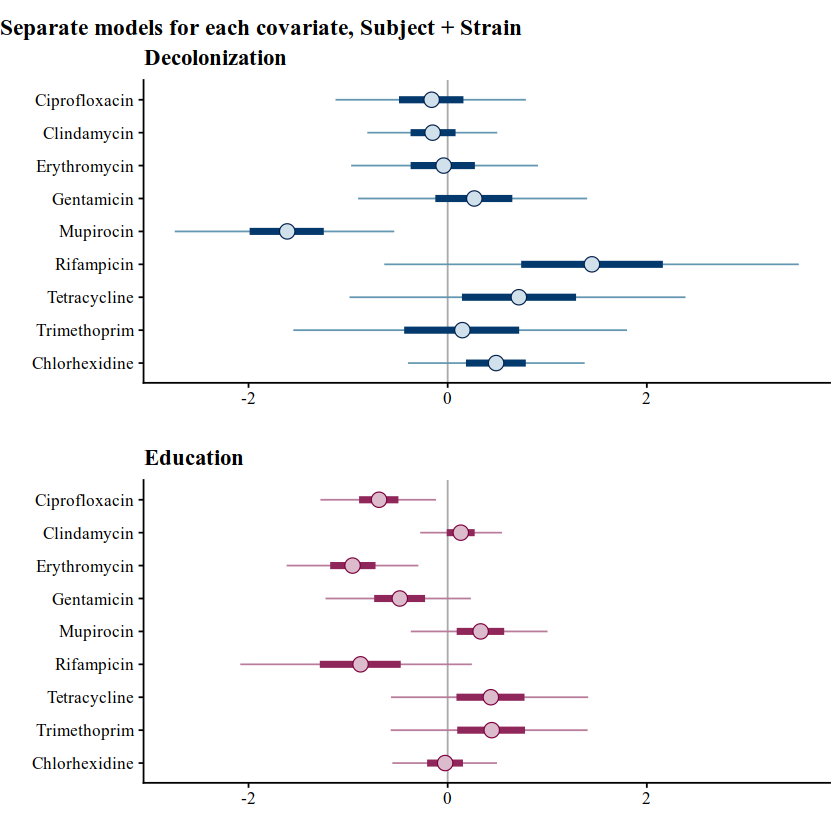

In [36]:
arm_figs(mods[[modnameD]], mods[[modnameE]],
         plotfun = get_mcmc_intervals, params = pars,
         is_model1 = is_mod1, title = title, vjust = 1)

In [37]:

fname <- paste(paste(fname, fig_tag, sep = ""), ".pdf", sep = "")

fname <- "S11_fig.pdf" # Rename the figure for the manuscript
pdf(paste(fig_savedir, fname, sep = ""))
arm_figs(mods[[modnameD]], mods[[modnameE]],
         plotfun = get_mcmc_intervals, params = pars,
         is_model1 = is_mod1, title = title, vjust = 1)
dev.off()

png 
  2

png 
  2

# Logistic Regression and Cox Proportional Hazards model


## Bayesian logistic regression

To compare the results of the Bayesian survival analysis with some widely used alternative methods, we considered a simple Bayesian logistic regression model using the `rstanarm` package. 

Sources:
- Example of Bayesian logistic regression with `rstanarm`: https://avehtari.github.io/modelselection/diabetes.html
- Manual of the `rstanarm` package: https://cran.r-project.org/web/packages/rstanarm/rstanarm.pdf


In [38]:
params <- treatments

mod_data <- data
mod_data[which(mod_data$y == 3), "y"] <- 1

params <- check_no_resistant_obs(data, params)
formula_start <- "y ~"
raneff <- c()

if (length(raneff) != 0){
    re <-gsub(",", "", toString(paste(paste("+(1|", raneff, sep = ""), ")", sep = "")))
}

re <- ""

formula <- paste(paste(formula_start, gsub(",", " + ", toString(params)), sep = ""),re, sep = "")
head(mod_data)
formula

,Visit..,host_id,strain,y,ARM,delta_t,ST,Ciprofloxacin,Clindamycin,Erythromycin,Gentamicin,Mupirocin,Rifampicin,Tetracycline,Trimethoprim,Chlorhexidine,t0,CHG.Bathing,CHG.Oral.Rinse,Mupirocin.Adherence
,<chr>,<int>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>
1,V1,1003,135,0,1,1.200000,5,1,1,1,0,0,0,0,0,0,1.200000,1,1,1
3,V1,1008,1,1,1,1.000000,5,1,1,1,0,0,1,0,0,1,0.010000,1,1,1
6,V1,1018,1097,1,1,1.000000,8,1,0,1,0,0,0,0,0,0,0.010000,1,1,1
13,V1,1029,360,0,1,1.633333,8,1,0,1,0,0,0,0,0,0,1.633333,1,1,1
16,V1,1048,1123,1,1,1.000000,8,1,0,0,0,0,0,0,0,0,0.010000,1,1,1
21,V1,1058,362,0,1,1.000000,8,1,0,1,1,1,0,0,0,0,1.000000,1,1,1


[1] "y ~Ciprofloxacin +  Clindamycin +  Erythromycin +  Gentamicin +  Mupirocin +  Rifampicin +  Tetracycline +  Trimethoprim +  Chlorhexidine"

In [39]:
set.seed(150545)

In [40]:
library("rstanarm")
logreg_d <- stan_glm(as.formula(formula), data = mod_data[which(mod_data$ARM == 1),],
                 family = binomial(link = "logit"), seed = 9423, refresh=0)


logreg_e <- stan_glm(as.formula(formula), data = mod_data[which(mod_data$ARM == 0),],
                 family = binomial(link = "logit"), seed = 9423, refresh=0)

png 
  2

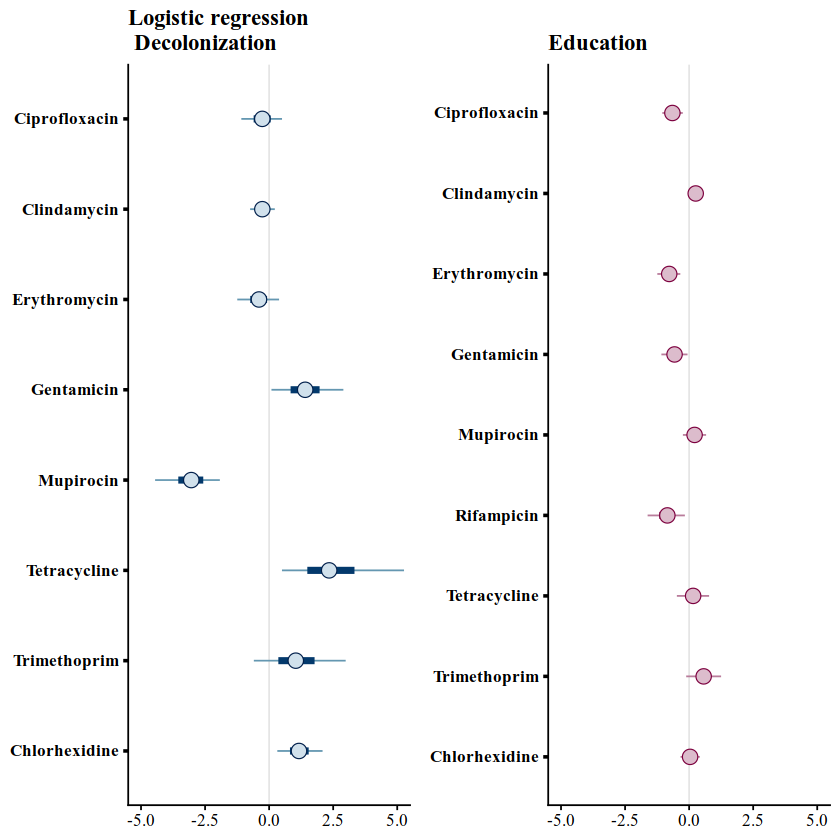

In [41]:
library("bayesplot")
library("ggplot2")
library("cowplot")


color_scheme_set("blue")
minx <- -5
maxx <- 5

pd_logreg <- mcmc_intervals(logreg_d, pars = params[params != "Rifampicin"]) +
    coord_cartesian(xlim = c(minx, maxx)) +
    labs(title = "Logistic regression\n Decolonization")
    


color_scheme_set("pink")
pe_logreg <- mcmc_intervals(logreg_e, pars = params) +
    coord_cartesian(xlim = c(minx, maxx)) +
    labs(title = "\nEducation")


plot_grid(pd_logreg, pe_logreg)


## Cox proportional hazards model

As an alternative to a Bayesian method, we consider the widely-used Cox' proportional hazards method. We use the `survival` package and the `coxph` function.

Sources:
- Manual of the survival package: https://cran.r-project.org/web/packages/survival/survival.pdf



In [42]:
# For the coxph function, the covariates are converted to factors:

for (t in treatments){
    data[,t] <- as.factor(data[,t])
}

# Change y back to 1 (it is 3 because of interval censoring in stan_surv)
data$y[data$y == 3] <- 1

head(data)

,Visit..,host_id,strain,y,ARM,delta_t,ST,Ciprofloxacin,Clindamycin,Erythromycin,Gentamicin,Mupirocin,Rifampicin,Tetracycline,Trimethoprim,Chlorhexidine,t0,CHG.Bathing,CHG.Oral.Rinse,Mupirocin.Adherence
,<chr>,<int>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<dbl>,<chr>,<chr>,<chr>
1,V1,1003,135,0,1,1.200000,5,1,1,1,0,0,0,0,0,0,1.200000,1,1,1
3,V1,1008,1,1,1,1.000000,5,1,1,1,0,0,1,0,0,1,0.010000,1,1,1
6,V1,1018,1097,1,1,1.000000,8,1,0,1,0,0,0,0,0,0,0.010000,1,1,1
13,V1,1029,360,0,1,1.633333,8,1,0,1,0,0,0,0,0,0,1.633333,1,1,1
16,V1,1048,1123,1,1,1.000000,8,1,0,0,0,0,0,0,0,0,0.010000,1,1,1
21,V1,1058,362,0,1,1.000000,8,1,0,1,1,1,0,0,0,0,1.000000,1,1,1


In [43]:
# CoxPH package:
library("survival")

cox.d <- coxph(Surv(delta_t, y) ~ Ciprofloxacin + Clindamycin + Erythromycin + 
               Gentamicin + Mupirocin + Rifampicin + Tetracycline + Trimethoprim + Chlorhexidine,
               data = data[which(data$ARM == 1),])
cox.d.mup <- coxph(Surv(delta_t, y) ~ Mupirocin,
               data = data[which(data$ARM == 1),])

cox.e <- coxph(Surv(delta_t, y) ~ Ciprofloxacin + Clindamycin + Erythromycin + 
               Gentamicin + Mupirocin + Rifampicin + Tetracycline + Trimethoprim + Chlorhexidine,
               data = data[which(data$ARM == 0),])

Warning message:
“package ‘survival’ was built under R version 4.2.0”


In [44]:
summary(cox.d)
summary(cox.e)

Call:
coxph(formula = Surv(delta_t, y) ~ Ciprofloxacin + Clindamycin + 
    Erythromycin + Gentamicin + Mupirocin + Rifampicin + Tetracycline + 
    Trimethoprim + Chlorhexidine, data = data[which(data$ARM == 
    1), ])

  n= 253, number of events= 157 
   (17 observations deleted due to missingness)

                   coef exp(coef) se(coef)      z Pr(>|z|)    
Ciprofloxacin1 -0.19410   0.82357  0.26929 -0.721 0.471041    
Clindamycin1   -0.22684   0.79705  0.17966 -1.263 0.206739    
Erythromycin1  -0.02728   0.97308  0.26001 -0.105 0.916425    
Gentamicin1     0.48853   1.62993  0.37539  1.301 0.193115    
Mupirocin1     -1.53574   0.21530  0.41845 -3.670 0.000242 ***
Rifampicin1     0.99809   2.71310  0.47209  2.114 0.034499 *  
Tetracycline1   0.39324   1.48178  0.41143  0.956 0.339182    
Trimethoprim1   0.71347   2.04106  0.47674  1.497 0.134506    
Chlorhexidine1  0.41550   1.51513  0.24542  1.693 0.090456 .  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Call:
coxph(formula = Surv(delta_t, y) ~ Ciprofloxacin + Clindamycin + 
    Erythromycin + Gentamicin + Mupirocin + Rifampicin + Tetracycline + 
    Trimethoprim + Chlorhexidine, data = data[which(data$ARM == 
    0), ])

  n= 883, number of events= 377 
   (28 observations deleted due to missingness)

                   coef exp(coef) se(coef)      z Pr(>|z|)   
Ciprofloxacin1 -0.43403   0.64790  0.15488 -2.802  0.00507 **
Clindamycin1    0.19533   1.21572  0.11337  1.723  0.08489 . 
Erythromycin1  -0.38177   0.68265  0.17789 -2.146  0.03186 * 
Gentamicin1    -0.25807   0.77254  0.22954 -1.124  0.26089   
Mupirocin1      0.13203   1.14114  0.19803  0.667  0.50497   
Rifampicin1    -0.77209   0.46205  0.39258 -1.967  0.04921 * 
Tetracycline1  -0.06696   0.93524  0.25819 -0.259  0.79538   
Trimethoprim1   0.45604   1.57781  0.27557  1.655  0.09795 . 
Chlorhexidine1  0.06259   1.06459  0.16321  0.384  0.70134   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

        

In [45]:
# Write the results in a .csv table:

get_coxph_table <- function(fitted_cox, treatments){
    #' Create a matrix from Cox PH results which includes 
    #' the estimated coefficients, their 95% confidence intervals and the p-values for each covariate.
    #'
    #' @param fitted_cox Output of the coxph() function (from package 'survival')
    
    res_cox <- cbind(fitted_cox$coefficients, confint(fitted_cox))
    p_values <- summary(fitted_cox)$coefficients[, "Pr(>|z|)"]
    res_cox <- cbind(res_cox, p_values)
    colnames(res_cox) <- c("Coefficient", "CI2.5", "CI97.5", "p")
    rownames(res_cox) <- treatments
    
    res_cox <- as.data.frame(res_cox)
    res_cox <- res_cox[rev(row.names(res_cox)), ]
    
    return(res_cox)

}


write.csv(get_coxph_table(cox.d, treatments), paste(fig_savedir, "/cox_res_d.csv", sep = ""), row.names = T)
write.csv(get_coxph_table(cox.e, treatments), paste(fig_savedir, "/cox_res_e.csv", sep = ""), row.names = T)

In [46]:
# Testing the PH assumption:

cox.zph(cox.d) 
cox.zph(cox.e)

                chisq df    p
Ciprofloxacin 0.46430  1 0.50
Clindamycin   0.76478  1 0.38
Erythromycin  0.49468  1 0.48
Gentamicin    0.00448  1 0.95
Mupirocin     0.08329  1 0.77
Rifampicin    3.53002  1 0.06
Tetracycline  1.62047  1 0.20
Trimethoprim  0.41020  1 0.52
Chlorhexidine 0.02514  1 0.87
GLOBAL        7.58419  9 0.58

                chisq df      p
Ciprofloxacin  2.0203  1 0.1552
Clindamycin    0.9174  1 0.3381
Erythromycin   0.1470  1 0.7014
Gentamicin     0.1439  1 0.7044
Mupirocin      3.0040  1 0.0831
Rifampicin     0.0769  1 0.7816
Tetracycline  13.7868  1 0.0002
Trimethoprim   2.6511  1 0.1035
Chlorhexidine  0.2663  1 0.6058
GLOBAL        21.5793  9 0.0103

In [47]:
library("bayesplot")

## Plot the coefficients with 95% confidence intervals:

get_coxph_95_interval_fig <- function(df, col_scheme = "blue"){
    
    color_scheme_set(col_scheme)
    p <- ggplot(df, aes(Coefficient, rownames(df))) +
    geom_vline(xintercept = 0, color = "darkgray") +
    geom_errorbar(aes(xmin = CI2.5, xmax = CI97.5),
                  color = color_scheme_get()$mid,
                 width = 0, size = 0.5)+
    geom_point(shape = 21, size = 4,
               colour = color_scheme_get()$dark_highlight,
               fill = color_scheme_get()$light) +
    xlab("") +
    ylab("") +
    scale_y_discrete(limits = rownames(df))
    
    return(p)
    
}

df <- get_coxph_table(cox.d, treatments)
pd_cox <- get_coxph_95_interval_fig(df) +
labs(title = "Cox PH coefficients, 95% CI\n Decolonization", x = "Coefficient") +
coord_cartesian(xlim = c(-5, 5))


df <- get_coxph_table(cox.e, treatments)
pe_cox <- get_coxph_95_interval_fig(df, col_scheme = "pink") + labs(title = "\nEducation") +
coord_cartesian(xlim = c(-5, 5))

#fname <- "coxph_95intervals.pdf"
#pdf(paste(fig_savedir, fname, sep = ""), height = 4)
#plot_grid(pd_cox, pe_cox)
#dev.off()

png 
  2

In [48]:
as.data.frame(get_coxph_table(cox.d, treatments))

,Coefficient,CI2.5,CI97.5,p
,<dbl>,<dbl>,<dbl>,<dbl>
Chlorhexidine,0.41549998,-0.06552043,0.8965204,0.0904564789
Trimethoprim,0.71346728,-0.22091752,1.6478521,0.1345057639
Tetracycline,0.39324272,-0.41315478,1.1996402,0.3391815364
Rifampicin,0.99809244,0.07281145,1.9233734,0.0344985425
Mupirocin,-1.53574056,-2.35588812,-0.7155930,0.0002424872
Gentamicin,0.48853470,-0.24720834,1.2242777,0.1931148644
Erythromycin,-0.02728465,-0.53688814,0.4823188,0.9164247452
Clindamycin,-0.22683672,-0.57896565,0.1252922,0.2067392788
Ciprofloxacin,-0.19410101,-0.72190123,0.3336992,0.4710412033


png 
  2

png 
  2

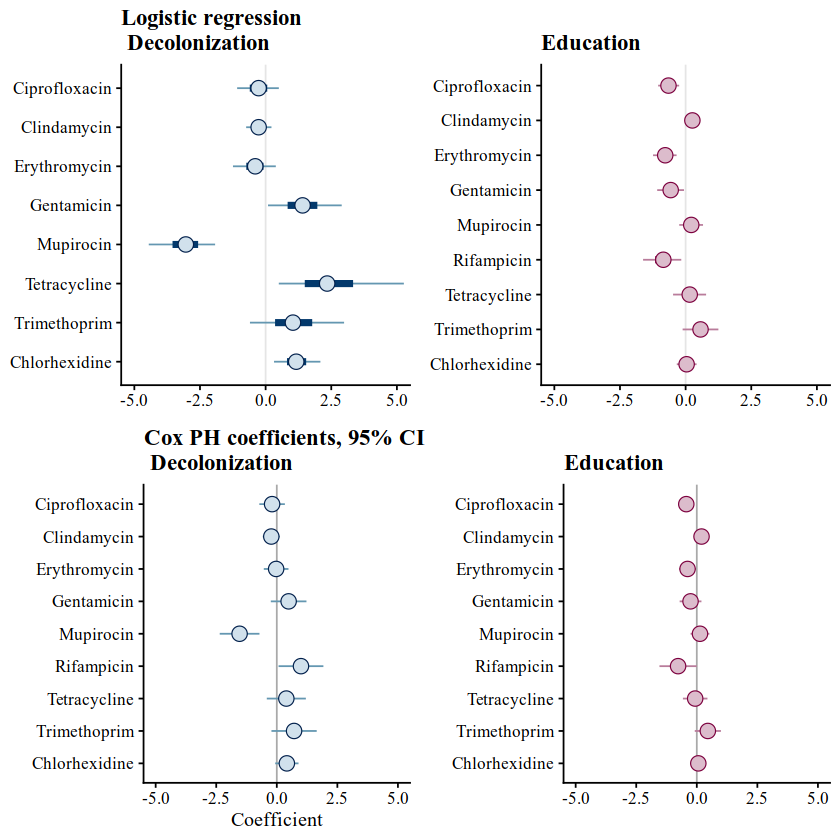

In [49]:
# A figure with logreg and CoxPH:

plot_grid(pd_logreg + theme_cowplot(font_family = "Times", font_size=12), pe_logreg + theme_cowplot(font_family = "Times", font_size=12),
          pd_cox, pe_cox, 
          nrow = 2, ncol = 2)

# Renamed for the publication:

fname <- "S9_fig.pdf"
pdf(paste(fig_savedir, fname, sep = ""), height = 7)

plot_grid(pd_logreg + theme_cowplot(font_family = "Times", font_size=12), pe_logreg + theme_cowplot(font_family = "Times", font_size=12),
          pd_cox, pe_cox, 
          nrow = 2, ncol = 2)


dev.off()